In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Input dan Read Data

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Statistik deskriptif dari data

In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Check value yang kosong

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Preprocessing
Isi data kosong pada kolom Age dengan Median <br>
Isi data kosong pada kolom Embarked dengan <br>
Drop (Hapus) kolom Cabin karena banyak yang kosong dan kemungkinan tidak berpengaruh dalam analisis

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [6]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
df = df.drop('Cabin', axis=1)

## Recheck hasil setelah preprocessing

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Feature Engineering
### Label Encoder untuk mengubah data kategorik menjadi numerik

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [12]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
x = df[features]
y = df['Survived']

In [13]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Train Test Split, Memisahkan data untuk dilatih dan diuji

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 66)

### Data Train

In [16]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
655,2,1,24.0,2,0,73.5000,2
155,1,1,51.0,0,1,61.3792,0
838,3,1,32.0,0,0,56.4958,2
114,3,0,17.0,0,0,14.4583,0
854,2,0,44.0,1,0,26.0000,2
...,...,...,...,...,...,...,...
122,2,1,32.5,1,0,30.0708,0
51,3,1,21.0,0,0,7.8000,2
631,3,1,51.0,0,0,7.0542,2
828,3,1,28.0,0,0,7.7500,1


In [17]:
y_train

655    0
155    0
838    1
114    0
854    0
      ..
122    0
51     0
631    0
828    1
20     0
Name: Survived, Length: 712, dtype: int64

### Data Test

In [18]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
28,3,0,28.0,0,0,7.8792,1
652,3,1,21.0,0,0,8.4333,2
141,3,0,22.0,0,0,7.7500,2
669,1,0,28.0,1,0,52.0000,2
200,3,1,28.0,0,0,9.5000,2
...,...,...,...,...,...,...,...
480,3,1,9.0,5,2,46.9000,2
638,3,0,41.0,0,5,39.6875,2
188,3,1,40.0,1,1,15.5000,1
603,3,1,44.0,0,0,8.0500,2


In [19]:
y_test

28     1
652    0
141    1
669    1
200    0
      ..
480    0
638    0
188    0
603    0
751    1
Name: Survived, Length: 179, dtype: int64

## Modeling
### Membangun Classification model menggunakan ExtraTreeClassifier

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators = 100, random_state = 66)
model.fit(x_train, y_train)

ExtraTreesClassifier(random_state=66)

- n_estimators menentukan jumlah pohon (trees) yang akan dibuat dalam Random Forest. Ketika kita set n_estimators=100, ini berarti kita akan membuat 100 pohon keputusan (decision trees) yang berbeda. Setiap pohon akan membuat prediksi, dan hasil akhir adalah kombinasi dari semua prediksi pohon tersebut.
- random_state adalah angka yang digunakan untuk mengatur "benih" acak (random seed). Penggunaan random_state memastikan bahwa hasil yang kita dapatkan dari menjalankan model selalu konsisten. Misalnya, setiap kali kita menjalankan kode dengan random_state=42, hasilnya akan sama.

## Evaluation

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Prediksi data test menggunakan model ExtraTreesClassifier yang sudah dibangun

In [22]:
y_pred = model.predict(x_test)

In [23]:
df_comparison = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_pred
})

df_comparison

,Actual,Predicted
28,1,1
652,0,0
141,1,1
669,1,1
200,0,0
...,...,...
480,0,0
638,0,0
188,0,0
603,0,0


## Buat confusion matrix

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[104  12]
 [ 15  48]]


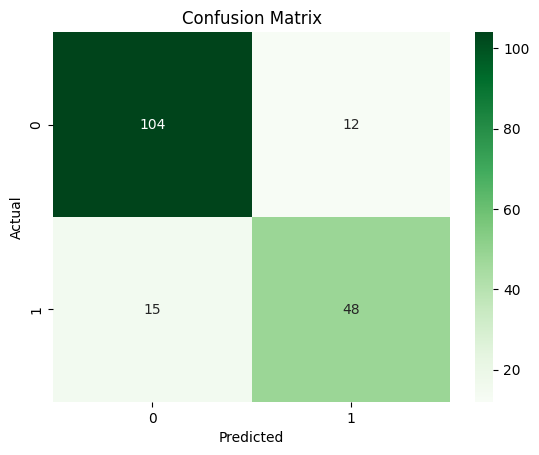

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### Pada grafik diatas 0=Meninggal dan 1=Hidup

## Hitung akurasi dari prediksi

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


## Feature Importances
Yaitu fitur yang berfungsi untuk mengetahui faktor apa saja yang mempengaruhi survive atau tidaknya

In [27]:
feature_importance = model.feature_importances_
feature_names = x_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

df_feature_importance

,Feature,Importance
1,Sex,0.301789
2,Age,0.239972
5,Fare,0.234584
0,Pclass,0.103942
3,SibSp,0.048246
4,Parch,0.040837
6,Embarked,0.030631
